In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IST347/Week_9/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df.iloc[:,3:5].values
# y = df.iloc[:,-1].values

Use Elbow Method to find the optimal number of cluster K


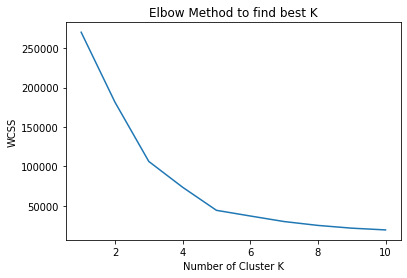

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)    

plt.plot(range(1,11), wcss)
plt.title('Elbow Method to find best K')    
plt.xlabel('Number of Cluster K')
plt.ylabel('WCSS')
plt.show()


Training the KMeans model on dataset with K = 5

In [ ]:
kmeans = KMeans(n_clusters= 5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [ ]:
frame = pd.DataFrame(X)
frame['Cluster'] = y_kmeans
frame['Cluster'].value_counts()

1    81
2    39
4    35
3    23
0    22
Name: Cluster, dtype: int64

Visualising the Cluster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


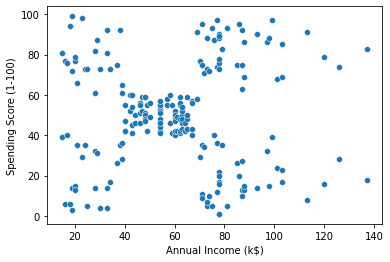

In [ ]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])

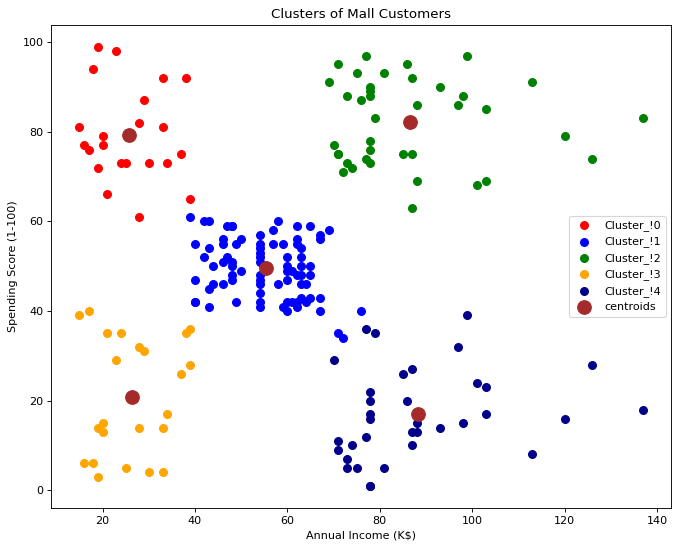

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
color = ['red','blue','green','orange','darkblue','brown']

for j in range(5):
    plt.scatter(X[y_kmeans ==j,0], X[y_kmeans ==j,1], s=50, c=color[j], label = 'Cluster_' + str(j))

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'brown', label = 'centroids')

plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
#Class example, I prefer to use loop! :) 

# plt.figure(figsize=(10, 8), dpi=80)
# plt.scatter(X[y_kmeans ==0,0], X[y_kmeans ==0,1], s=50, c='red', label = 'Cluster_1')
# plt.scatter(X[y_kmeans ==1,0], X[y_kmeans ==1,1], s=50, c='blue', label = 'Cluster_2')
# plt.scatter(X[y_kmeans ==2,0], X[y_kmeans ==2,1], s=50, c='green', label = 'Cluster_3')
# plt.scatter(X[y_kmeans ==3,0], X[y_kmeans ==3,1], s=50, c='orange', label = 'Cluster_4')
# plt.scatter(X[y_kmeans ==4,0], X[y_kmeans ==4,1], s=50, c='darkblue', label = 'Cluster_5')
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'brown', label = 'centroids')
# plt.title('Clusters of Mall Customers')
# plt.xlabel('Annual Income (K$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()